This problem I found in [Kaggle's 'Iris Species' competition](https://www.kaggle.com/uciml/iris).

I also recommend you before view this solution to preview 'data_changing.ipynb'

## Import data and libraries

In [506]:
import pandas as pd
import numpy as np
from random import random
import matplotlib.pyplot as plt

In [507]:
data=pd.read_csv('updated_iris.csv')

### Note that in data:
####  0-Iris-setosa
#### 1-Iris-versicolor
#### 2-Iris-virginica

In [508]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [509]:
iris_species={
    0:'Iris-setosa',
    1:'Iris-versicolor',
    2:'Iris-virginica'
}

## Set some variables

In [510]:
x=data.values[:,0:-1]
y=data.values[:,-1]
init_theta=np.random.random((1,(x.shape)[1]))

In [511]:
init_theta 

array([[0.04990546, 0.78778706, 0.34830356, 0.10759203]])

## Set functions

In [512]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z) )

In [513]:
def onevsall(theta,X,y):
    m,n=X.shape
    count=int(np.max(y))
    
    opt_theta=np.zeros((count+1,n))
    out_j=np.array([])
    
    initial_theta=theta
    
    for i in np.arange(count+1):
        out_theta,j_hist= gradient_descent( initial_theta , X , np.where( y==i,1,0 )   ,1000,0.1 )
        opt_theta[i,:]=out_theta
        out_j=np.hstack((j_hist,out_j))
        
    return opt_theta,out_j 

#### Try to minimize our cost function 

In [514]:
def cost_grad(theta,X,y):
    m,n=X.shape
    h = sigmoid((theta) @ X.T)
    h=h.flatten()
    
    J = (1 / m) * np.sum(  (-y) @ (np.log(h)) - (1 - y) @ (np.log(1 - h)))
    grad = (1 / m) * ( X.T  @ (h - y) )
    return J,grad

In [515]:
def gradient_descent(theta,X,y,iteration,alpha):
    m,n=X.shape
    j_hist=np.array([])
    for i in np.arange(iteration):
        J,grad=cost_grad(theta,X,y)
        theta=theta-(alpha*grad)
        j_hist= np.hstack((J,j_hist))
    return theta,j_hist    

## Figure out parameters

In [516]:
X=np.hstack((np.ones((x.shape[0],1)),x))
into_theta=np.hstack((np.ones((init_theta.shape[0],1)),init_theta))

In [517]:
opt_theta,j=onevsall(into_theta,X,y)
print('Here\'s optimal parameters:\n',opt_theta)

Here's optimal parameters:
 [[ 1.2210736   0.06315552  2.15700178 -2.6409954  -1.21561686]
 [ 1.59840486  0.36815467 -1.7216658   0.66465501 -1.55510559]
 [-0.38169867 -2.41523247 -1.72424762  3.21872176  2.83488284]]


In [518]:
def prediction(X,theta):
    m,n=X.shape
    y_out=[]
    
    for i in range(m):
        test=sigmoid(theta @ X[i,:].T)
        add=np.argmax(test)
        y_out.append(add)
    return np.array(y_out)    

In [519]:
val=prediction(X,opt_theta)


#### Let's find accuaracy and look at our error(cost history)

In [520]:
def accuaracy(val,y):
    s=list(val==y)
    count1=s.count(True)
    count2=(y.shape[0])
    
    acc=count1/count2
    return acc

In [521]:
acc=accuaracy(val,y)
print('accuaracy is: {0:.5f} % ' .format(acc*100))

accuaracy is: 96.66667 % 


In [522]:
errors=j[::1000]
for i in range(len(errors)):
    print(  'for %i row parametr error is %.5f ' % ( i+1,errors[i] ))

for 1 row parametr error is 0.13039 
for 2 row parametr error is 0.51201 
for 3 row parametr error is 0.00730 


Text(0, 0.5, 'Errors')

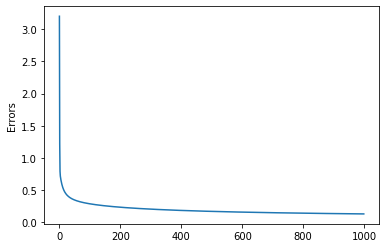

In [523]:
x_plt=np.array([i for i in np.arange(0,1000)])
y_plt=(j[0:1000])[::-1]
plt.plot( x_plt, y_plt  )
plt.ylabel('Errors')